# Visualization of Trends in College Grad Data

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/Absurd-1/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

> * Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.
>

We will make inferences on the popularity of majors, gender predominance in particular courses and the popularity of certain majors among students.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')

recent_grads.iloc[:7]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259


> A short snippet of the dataset is displayed above...

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


> The descriptive statistics of the columns.

Below, we will be dropping all the rows with NaN values since that would cause matplotlib to throw errors.

In [5]:
raw_data_count = recent_grads.shape[0]
recent_grads.dropna(axis=0, inplace=True)

cleaned_data_count = recent_grads.shape[0]

raw_data_count - cleaned_data_count # number of dropped rows

1

> Just one row was dropped using the dropna method.

## Pandas, Scatter Plots...
Below, we will be exploring some of the columns using the scatter plot.

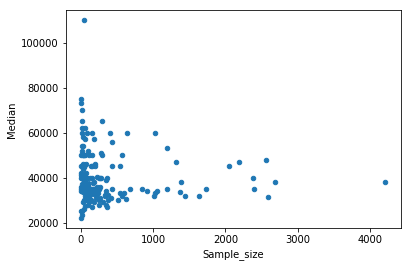

In [7]:
recent_grads.plot(kind='scatter', x='Sample_size', y='Median')

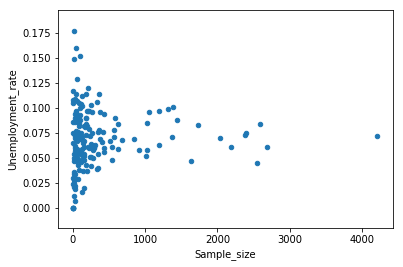

In [8]:
recent_grads.plot(kind='scatter', x='Sample_size', y='Unemployment_rate')

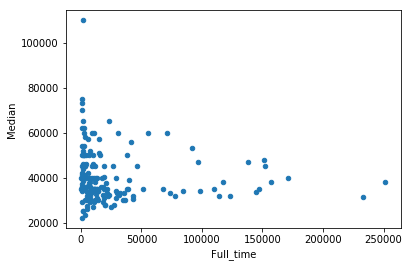

In [9]:
recent_grads.plot(kind='scatter', x='Full_time', y='Median')

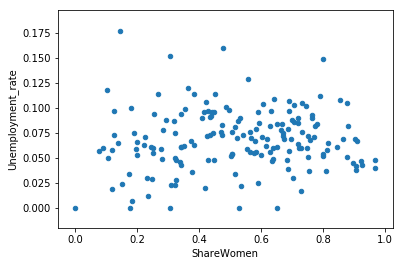

In [12]:
recent_grads.plot(kind='scatter', x='ShareWomen', y='Unemployment_rate')

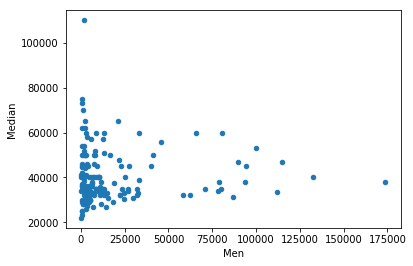

In [13]:
recent_grads.plot(kind='scatter', x='Men', y='Median')

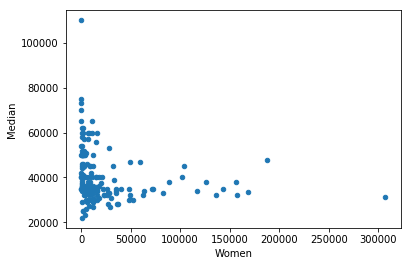

In [14]:
recent_grads.plot(kind='scatter', x='Women', y='Median')

## Pandas, Histogram...

In the cells below, we will be exploring several columns using histograms.

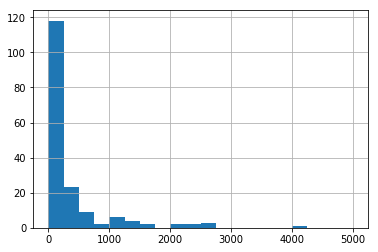

In [31]:
recent_grads['Sample_size'].hist(bins=20, range=(0, 5000))

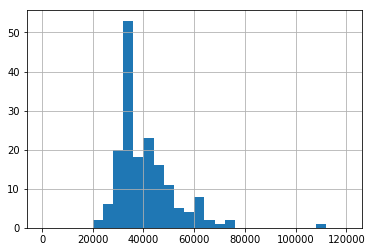

In [30]:
recent_grads['Median'].hist(bins=30, range=(0, 120000))

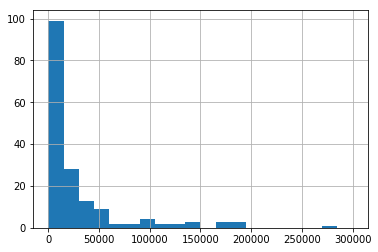

In [28]:
recent_grads['Employed'].hist(bins=20, range=(0, 300000))

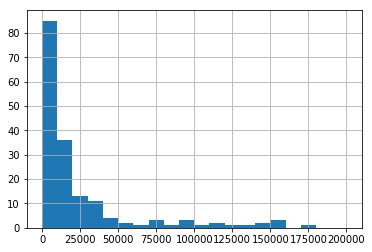

In [27]:
recent_grads['Full_time'].hist(bins=20, range=(0, 200000))

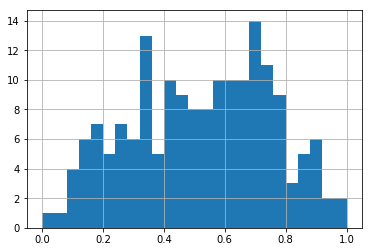

In [35]:
recent_grads['ShareWomen'].hist(bins=25, range=(0, 1))

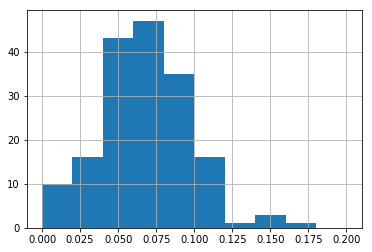

In [36]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0, 0.2))

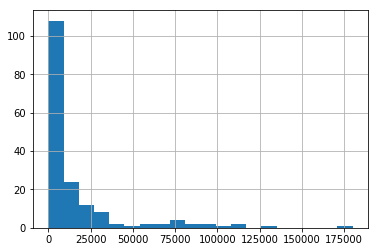

In [38]:
recent_grads['Men'].hist(bins=20, range=(0, 180000))

## Pandas, Scatter Matrix...

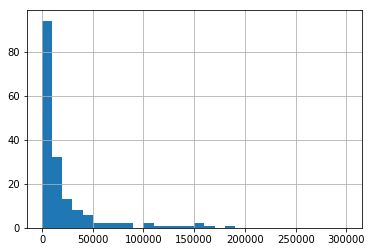

In [39]:
recent_grads['Women'].hist(bins=30, range=(0, 300000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C935297BE0>,
      dtype=object)

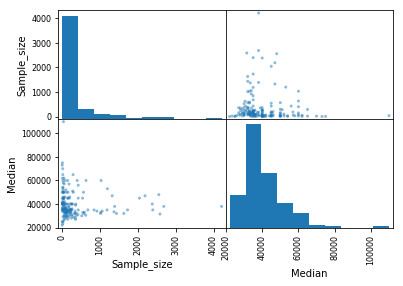

In [43]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[['Sample_size', 'Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C935359EB8>,
      dtype=object)

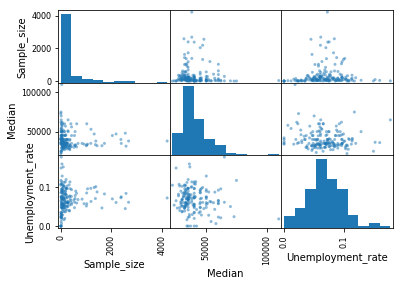

In [44]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

## Pandas, Bar Charts.. 

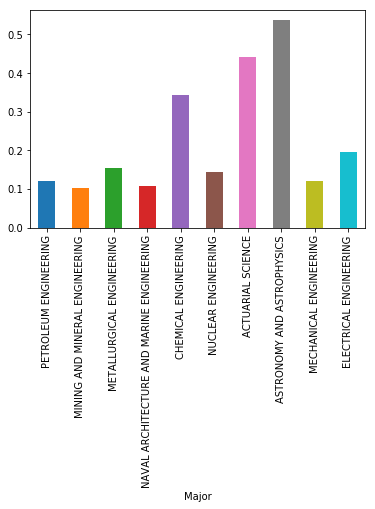

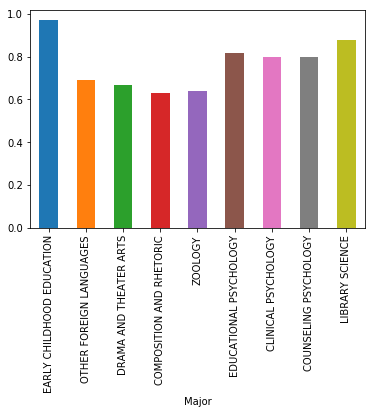

In [51]:
recent_grads[:10].plot(x='Major', y='ShareWomen', kind='bar', legend=False)

recent_grads[163:].plot(x='Major', y='ShareWomen', kind='bar', legend=False)

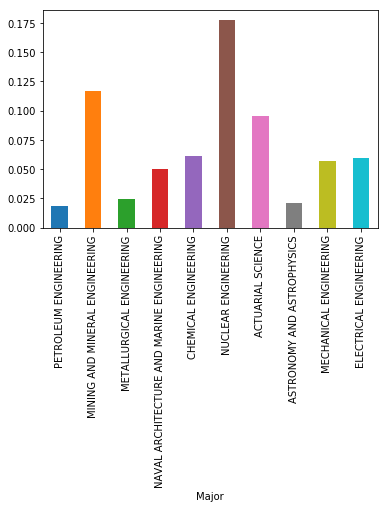

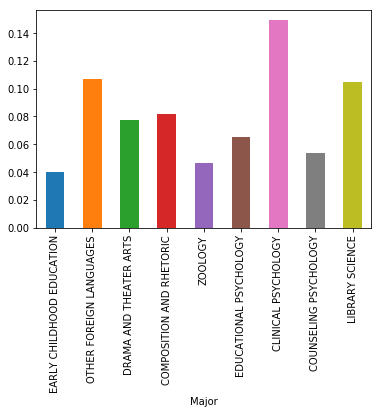

In [52]:
recent_grads[:10].plot(x='Major', y='Unemployment_rate', kind='bar', legend=False)

recent_grads[163:].plot(x='Major', y='Unemployment_rate', kind='bar', legend=False)